# Correlation between male unemployment rates and government education expenditure by % of total spending.

Providing education to the citizenry is a crucial function of modern governments and ensuring that spending is directed to the right places efficiently is extremely important. In this analysis of World Bank education data, I will investigate the correlation between the male unemployment rate and government education expenditure by % of total spending.

In order to analyze the data, we must first read in the file.

In [13]:
import pandas as pd

world_data = pd.read_csv("../../data/databank_education_2018.csv")
male_unemployment = world_data["SL.UEM.TOTL.MA.ZS"]
educ_spend = world_data["SE.XPD.TOTL.GB.ZS"]

Now, we want to know the shape of the two data columns. This next cell prints the shape of the dataframe and gives the head.

In [14]:
print(male_unemployment.shape)
print(educ_spend.shape)
world_data.head(10)

(244,)
(244,)


,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


I want to create a DataFrame with the two data columns I want to look at. This cell prints out a dataframe containing the columns "country", "educ_spend", and "male_unemployment".

In [15]:
together = world_data[["Country","SE.XPD.TOTL.GB.ZS","SL.UEM.TOTL.MA.ZS"]]
together.head(10)

,Country,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.MA.ZS
0,Afghanistan,NaN,10.290000
1,Albania,NaN,12.620000
2,Algeria,NaN,9.720000
3,Andorra,19.323059,NaN
4,Angola,NaN,6.720000
5,Antigua and Barbuda,NaN,NaN
6,Arab World,NaN,7.788688
7,Argentina,NaN,8.230000
8,Armenia,NaN,17.830000
9,Aruba,NaN,NaN


This DataFrame is weird because some of the data isn't complete. I now want to return a DataFrame that contains complete data. 

In [16]:
together_notna = together[male_unemployment.notna() & educ_spend.notna()]
print(together_notna.shape)
together_notna.head(10)

(72, 3)


,Country,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.MA.ZS
12,Azerbaijan,7.435460,4.080000
19,Belize,21.365290,4.480000
20,Benin,17.709181,2.200000
22,Bhutan,22.766460,1.780000
30,Burkina Faso,22.661169,4.750000
31,Burundi,19.919870,1.920000
33,Cambodia,8.838980,0.100000
34,Cameroon,16.883160,2.940000
36,Caribbean small states,18.584000,7.210998
42,Colombia,15.982620,7.090000


Let's clean up our data representation here more. I want to display a DataFrame with educ_spend in descending order with the 10 largest values.

In [17]:
together_notna.sort_values(by="SE.XPD.TOTL.GB.ZS", ascending = False).head(10)

,Country,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.MA.ZS
193,Sierra Leone,32.473221,5.20
46,Costa Rica,26.086670,8.00
84,Guatemala,23.749540,1.88
91,Honduras,22.954359,4.67
22,Bhutan,22.766460,1.78
30,Burkina Faso,22.661169,4.75
221,Togo,21.769091,4.55
190,Senegal,21.529409,6.15
19,Belize,21.365290,4.48
102,"Iran, Islamic Rep.",21.145679,10.38


Let's determine the relationship between these two sets of data with a scatter plot.

Text(0, 0.5, 'Male unemployment rate')

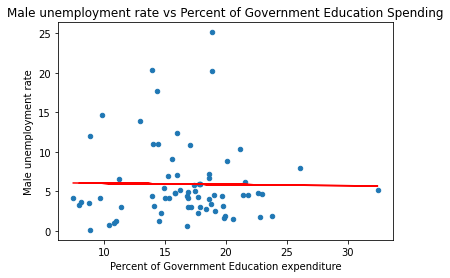

In [18]:
import numpy as np
x = np.polyfit(together_notna["SE.XPD.TOTL.GB.ZS"], together_notna["SL.UEM.TOTL.MA.ZS"], 1)
y = np.poly1d(x)
together_notna.insert(1, "scatter", y(together_notna["SE.XPD.TOTL.GB.ZS"]))
ax = together_notna.plot.scatter(x = "SE.XPD.TOTL.GB.ZS", y = "SL.UEM.TOTL.MA.ZS")
together_notna.plot(x= "SE.XPD.TOTL.GB.ZS", y="scatter",color= "Red", legend = False, ax=ax,  title = "Male unemployment rate vs Percent of Government Education Spending")
ax.set_xlabel("Percent of Government Education expenditure")
ax.set_ylabel("Male unemployment rate")

The data seems to be very loosely correlated if at all. Let's get some correlation statistics to better understand the potential relationship between our two chosen data columns

In [19]:
together_notna.corr()

,scatter,SE.XPD.TOTL.GB.ZS,SL.UEM.TOTL.MA.ZS
scatter,1.000000,-1.000000,0.014256
SE.XPD.TOTL.GB.ZS,-1.000000,1.000000,-0.014256
SL.UEM.TOTL.MA.ZS,0.014256,-0.014256,1.000000
